<a href="https://colab.research.google.com/github/Harishpatil0172/Airline_referral_classification/blob/main/Airline_passenger_referral_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<u>Importing all Necessary Libraries</u>

In [101]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [102]:
#All Machine learning Models are imported here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#<u>AirLines Data Frame</u>

In [103]:
#Loading the data
df=pd.read_excel('/content/drive/MyDrive/OTHER/data_airline_reviews.xlsx')
df

airline  overall               author  \
0                         NaN      NaN                  NaN   
1            Turkish Airlines      7.0  Christopher Hackley   
2                         NaN      NaN                  NaN   
3            Turkish Airlines      2.0        Adriana Pisoi   
4                         NaN      NaN                  NaN   
...                       ...      ...                  ...   
131890  Ukraine International      NaN     Andriy Yesypenko   
131891                    NaN      NaN                  NaN   
131892  Ukraine International      NaN    Volodya Bilotkach   
131893                    NaN      NaN                  NaN   
131894  Ukraine International      NaN      Kasper Hettinga   

               review_date                                    customer_review  \
0                      NaN                                                NaN   
1             8th May 2019  âœ… Trip Verified | London to Izmir via Istanb...   
2                      NaN                                                NaN   
3             7th May 2019  âœ… Trip Verified | Istanbul to Bucharest. We ...   
4                      NaN                                                NaN   
...                    ...                                                ...   
131890       19th May 2006  Kiev - London (Gatwick) in business class (in ...   
131891                 NaN                                                NaN   
131892     29th April 2006  Several flights - KBP to AMS (3 times one way)...   
131893                 NaN                                                NaN   
131894  10th February 2006  KBP-AMS with UIA. Although it was a relatively...   

       aircraft  traveller_type          cabin                         route  \
0           NaN             NaN            NaN                           NaN   
1           NaN        Business  Economy Class  London to Izmir via Istanbul   
2           NaN             NaN            NaN                           NaN   
3           NaN  Family Leisure  Economy Class         Istanbul to Bucharest   
4           NaN             NaN            NaN                           NaN   
...         ...             ...            ...                           ...   
131890      NaN             NaN            NaN                           NaN   
131891      NaN             NaN            NaN                           NaN   
131892      NaN             NaN            NaN                           NaN   
131893      NaN             NaN            NaN                           NaN   
131894      NaN             NaN            NaN                           NaN   

                 date_flown  seat_comfort  cabin_service  food_bev  \
0                       NaN           NaN            NaN       NaN   
1       2019-05-01 00:00:00           4.0            5.0       4.0   
2                       NaN           NaN            NaN       NaN   
3       2019-05-01 00:00:00           4.0            1.0       1.0   
4                       NaN           NaN            NaN       NaN   
...                     ...           ...            ...       ...   
131890                  NaN           NaN            NaN       NaN   
131891                  NaN           NaN            NaN       NaN   
131892                  NaN           NaN            NaN       NaN   
131893                  NaN           NaN            NaN       NaN   
131894                  NaN           NaN            NaN       NaN   

        entertainment  ground_service  value_for_money recommended  
0                 NaN             NaN              NaN         NaN  
1                 4.0             2.0              4.0         yes  
2                 NaN             NaN              NaN         NaN  
3                 1.0             1.0              1.0          no  
4                 NaN             NaN              NaN         NaN  
...               ...             ...              ...         ...  
131890 

In [104]:
#Shape of data
df.shape

(131895, 17)

In [105]:
#Dropping Null rows
df_clean=df.loc[~df.isnull().all(axis=1),:]

In [106]:
#Shape of Cleaned data
df_clean.shape

(65947, 17)

In [107]:
#Head of Data
df_clean.head()

airline  overall               author   review_date  \
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
5  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
7  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
9  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
1  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
3  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
5  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
7  Economy Class    Washington Dulles to Karachi           April 2019   
9  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
1           4.0            5.0       4.0            4.0             2.0   
3           4.0            1.0       1.0            1.0             1.0   
5           1.0            4.0       1.0            3.0             1.0   
7           4.0            5.0       5.0            5.0             5.0   
9           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
1              4.0         yes  
3              1.0          no  
5              2.0          no  
7              5.0         yes  
9              1.0          no

##Statistical Information

In [108]:
#Statistical information about data
df_clean.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  64017.000000  60681.000000   60715.000000  52608.000000   44193.000000   
mean       5.145430      2.952160       3.191814      2.908170       2.863372   
std        3.477532      1.441362       1.565789      1.481893       1.507262   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%        1.000000      1.000000       2.000000      1.000000       1.000000   
50%        5.000000      3.000000       3.000000      3.000000       3.000000   
75%        9.000000      4.000000       5.000000      4.000000       4.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  
count    39358.000000     63975.000000  
mean         2.692820         2.943962  
std          1.612215         1.587370  
min          1.000000         1.000000  
25%          1.000000         1.000000  
50%          3.000000         3.000000  
75%          4.000000         4.000000  
max          5.000000         5.000000

##Data types of each column


In [109]:
#Data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65947 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64(

## Droping Unnecessary columns

In [110]:
#Remove Unwanted Column
airline_df=df_clean.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

overall aircraft  traveller_type          cabin  seat_comfort  \
1      7.0      NaN        Business  Economy Class           4.0   
3      2.0      NaN  Family Leisure  Economy Class           4.0   
5      3.0      NaN        Business  Economy Class           1.0   
7     10.0     A330    Solo Leisure  Economy Class           4.0   
9      1.0      NaN    Solo Leisure  Economy Class           1.0   

   cabin_service  food_bev  entertainment  ground_service  value_for_money  \
1            5.0       4.0            4.0             2.0              4.0   
3            1.0       1.0            1.0             1.0              1.0   
5            4.0       1.0            3.0             1.0              2.0   
7            5.0       5.0            5.0             5.0              5.0   
9            1.0       1.0            1.0             1.0              1.0   

  recommended  
1         yes  
3          no  
5          no  
7         yes  
9          no



1.   Dropping __Airline&Author__ Column from the Data.Because those data does not related to my problem usecase.
2.   Dropping __Review_Date,Route,date_flown__ Column from the Data.It does not need for building a model.
3.   Dropping  __Customer_review__ from the Data. It is related to overall review from my datasets. 



##Cleaning Data by Removal of Null values

<u>__Numerical Data Imputation__</u>

1. __Quantile-1 value imputation__ for overall,seat_comfort,cabin_service and value_for_money column.
2. __Median Imputation__ for food_bev,entertainment and ground_service column
3. Removing __Aircraft Column__,Because it consists of __70% of null values__ in my entire data set.

In [111]:
#Percentage of null values 
airline_df.isnull().sum()/len(airline_df)*100

overall             2.926593
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

In [112]:
#Splitting the Numeric column

#Col_1 datas have low percentage of null values
col_1=['overall','seat_comfort','cabin_service','value_for_money']
#Col_2 datas have high percentage of null values
col_2=['food_bev','entertainment','ground_service']

1.  The Missing type of data belongs to __Missing Data Not At Random(MNAR)__
2.  Based on an __assumption as well as a business understanding__. Passengers may not prefer to tell the ratings. Because a traveller might have a __bad travel experience__ and does not want to share their opinion.

In [113]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [114]:
#Looping the null value column
for col in col_1:
  impute_by_q1_values(airline_df,col)

1.  We imputed null values by __Quantile-1__ value for __low percentage of null value column__, which is the least rating of each column.
2.  Whereas it __does not affect__ the __Original variance__ and __distribution__ of data.Because it only consists of >7% of null values.

In [115]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [116]:
#Looping the null value column
for col in col_2:
  median_imputation(airline_df,col)

1. We imputed null values by __Median Imputaion__ for __high percentage of null value column__. Because it consits of more than 7% of null values in each column.
2. This is done to __preserve the original distribution and variance__ of my data.

In [117]:
#Remove Aircraft column
airline_df.drop('aircraft',axis=1,inplace=True)

<u>__Categorical Data Imputation__</u>

1. __Mode Imputation__ for __Cabin__ Column.
2. Traveller type column is imputed using __Forward fill__ method.  

In [118]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [119]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [120]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

###Cleaning Data by Outliers Detection and Removal

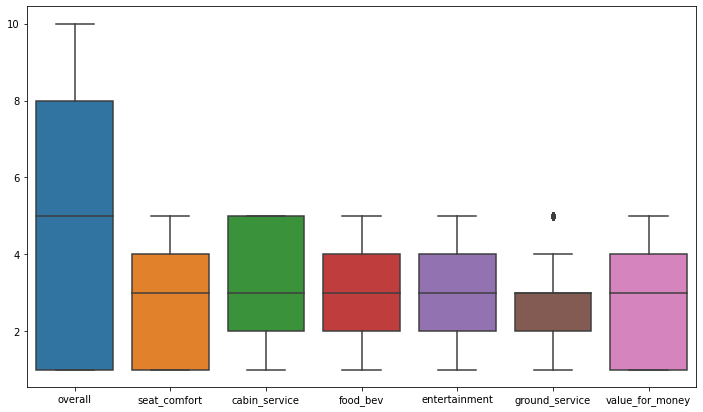

In [121]:
plt.figure(figsize=(12,7))
sns.boxplot(data=airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']])

<u>From above plot</u>
1. There is __no outlier__ present for each column.So no need of Handling Outliers.

In [122]:
#cleaned data
airline_df.head()

overall  traveller_type          cabin  seat_comfort  cabin_service  \
1      7.0        Business  Economy Class           4.0            5.0   
3      2.0  Family Leisure  Economy Class           4.0            1.0   
5      3.0        Business  Economy Class           1.0            4.0   
7     10.0    Solo Leisure  Economy Class           4.0            5.0   
9      1.0    Solo Leisure  Economy Class           1.0            1.0   

   food_bev  entertainment  ground_service  value_for_money recommended  
1       4.0            4.0             2.0              4.0         yes  
3       1.0            1.0             1.0              1.0          no  
5       1.0            3.0             1.0              2.0          no  
7       5.0            5.0             5.0              5.0         yes  
9       1.0            1.0             1.0              1.0          no

# <u>Exploratory Data Analysis</u>

1)Which Traveller_type has more ratings?<br>
2)Which type of Cabin has more recommendation?<br>
3)Is it Solo Leisure worth for Money?<br>
4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

__1)Which Traveller_type has more ratings?__


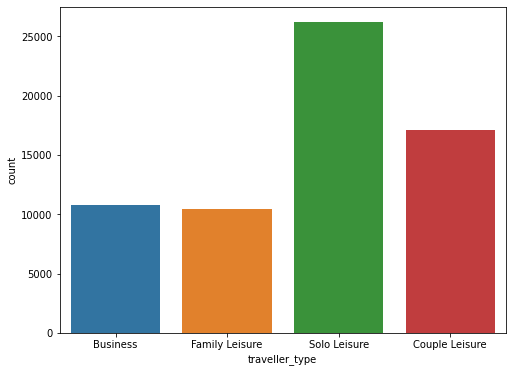

In [123]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['traveller_type'])

<u>From above plot</u>
1. Travelling type of **Solo Leisure** has more ratings 

__2)Which type of Cabin has more recommendation?__

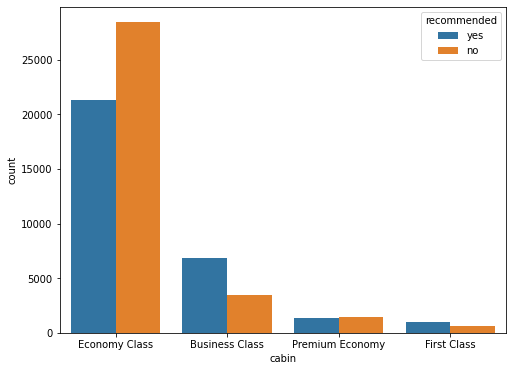

In [124]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

<u>From above plot</u>
1. **Economy class** has more recommendation.

__3)Is it Solo Leisure worth for Money?__

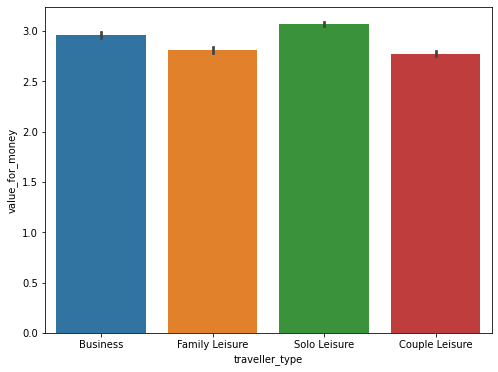

In [125]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])

<u>From above plot</u>
1. __Yes__,Travelling Type of __Solo Leisure worth of Money__ compare to other type of travelling.

__4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?__

In [126]:
#performing the grouphby method 
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()

In [127]:

eda_4

cabin  food_bev  entertainment
0   Business Class  3.484893       3.299729
1    Economy Class  2.794708       2.807445
2      First Class  3.383951       3.250000
3  Premium Economy  2.907824       3.011075

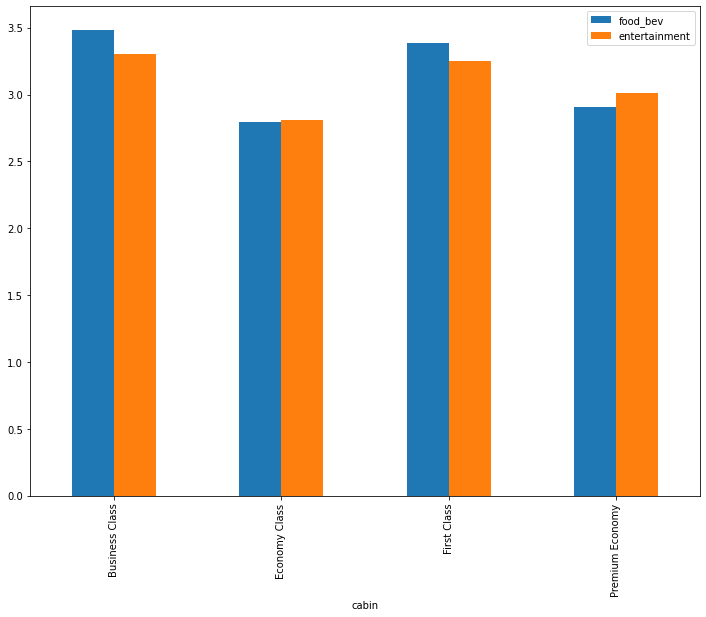

In [128]:
plt.rcParams['figure.figsize']=(12,9)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

<u>From above plot</u>

1. In Economy Class  the __average ratings__ of Food_bev and entertainment given by passenger is **lowest** compared to other cabin classes.

__Distribution of Numerical features__

In [129]:
# storing all numerical feature in numeric_feature variable
numeric_features=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

This feature is Discrete Numeric features,So we plotted histogram to see the frequency of our data.

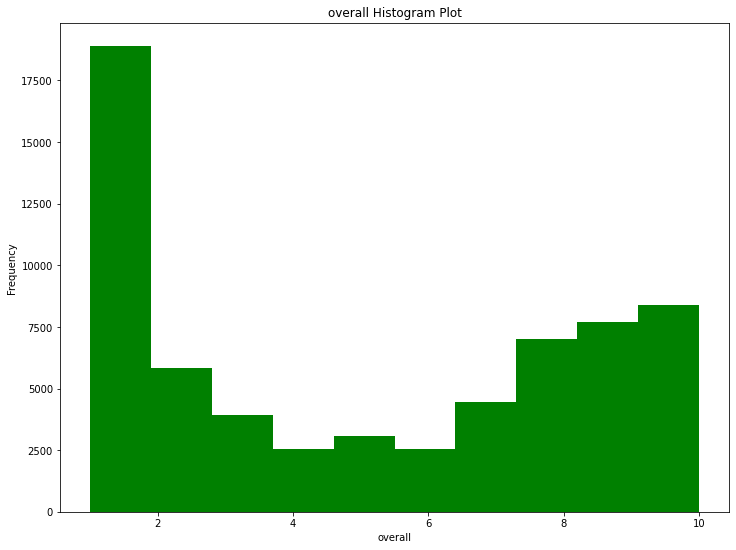

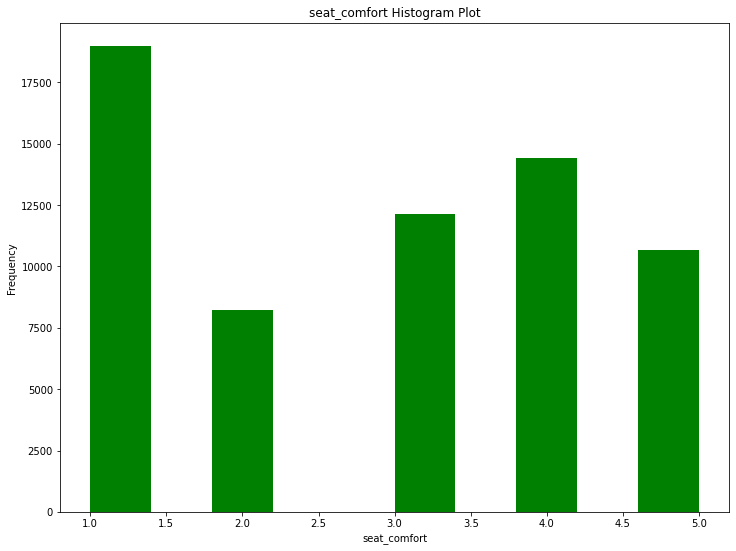

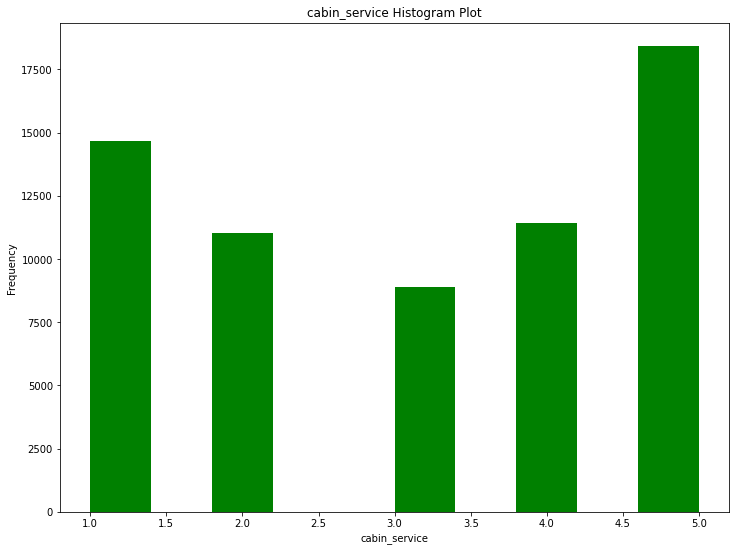

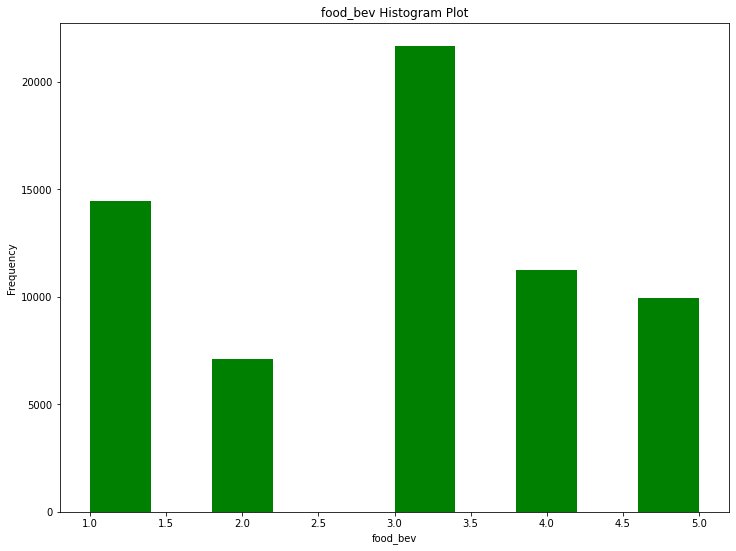

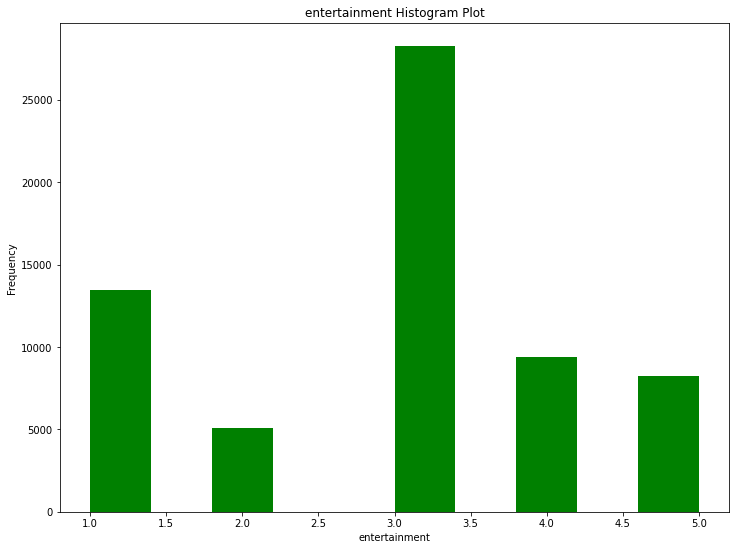

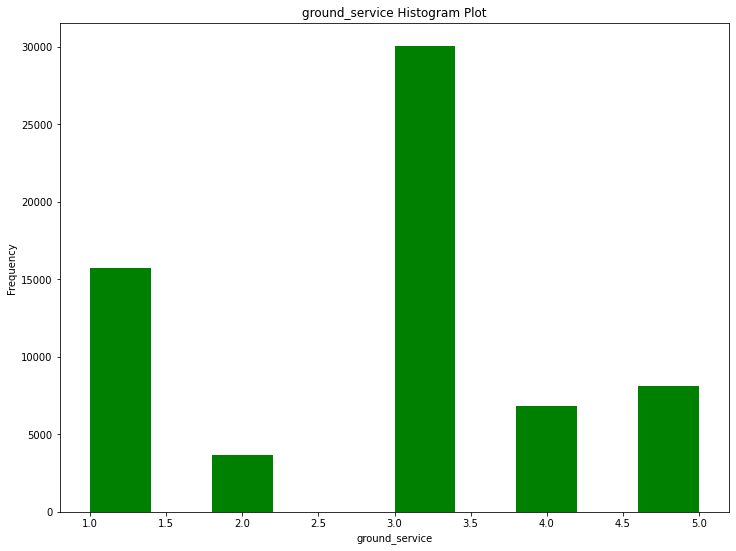

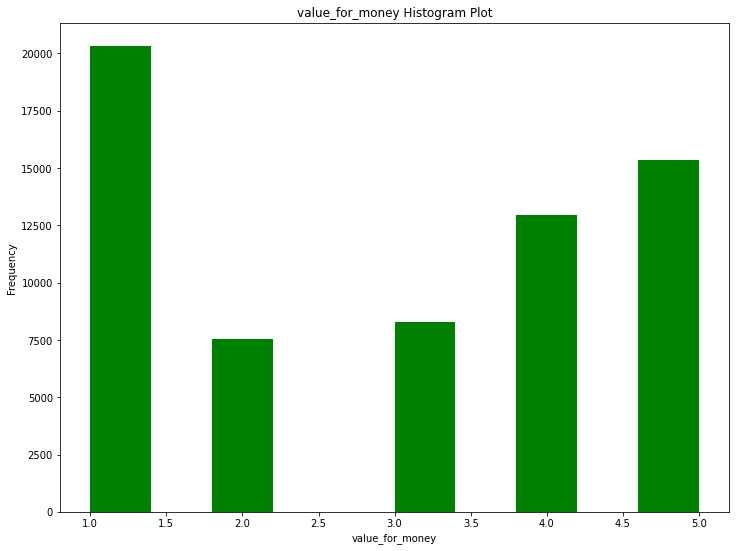

In [130]:
# plotting histogram for all numeric feature 
for i in numeric_features:
  plt.hist(airline_df[i], bins=10,color='green')
  plt.title(i+" Histogram Plot")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()
  print("")

<u>From above plot</u>
1. In comparison to other ratings, the __overall feature ratings of 1 to 2 occur more frequently__. Passengers are dissatisfied with service facilities such as food beverage, seat comfort, cabin service, and so on... As a result, passengers offer the worst overall ratings.

2. From __Seat comfort feature__, We can say that __rating of 1 is highest__ and __rating of 4 is the second highest__.

3. The __food bev feature__ ratings of __2,4 and 5__ are varies equally.Which means their __frequency are approximately equal__.

4. From  __cabin service feature__, We can say that __rating of 5 is highest__ and __rating of 1 is the second highest__.

5. The features of __both the entertainment & ground service__, We can say that __ratings of 3 is highest__ and __ratings of 1 is the second highest__.

6. From __value for money feature__, It clearly shows that **most of the passenger gives ratings of 1 as highest**. From this we can say that most of the **airline does not provide good service** to passenger.

##Correlation plot

In [131]:
#mapping the target feature with numerical data
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})

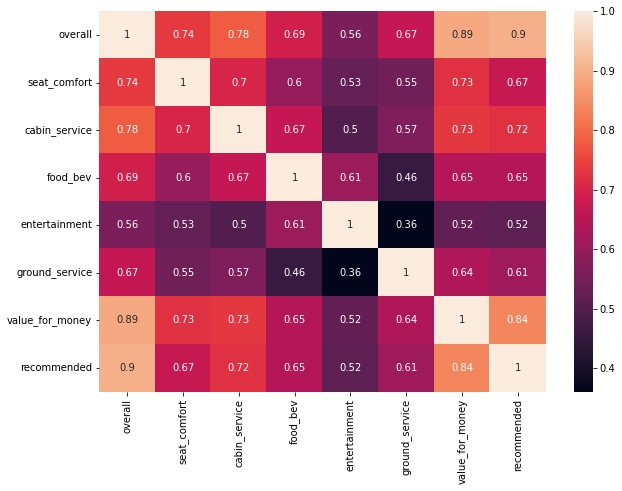

In [132]:
#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(airline_df.corr(),annot=True)

### Removing Multicollinearity features

In [133]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [134]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

variables        VIF
0    seat_comfort  10.951034
1   cabin_service  13.238540
2        food_bev  12.842290
3   entertainment   9.511114
4  ground_service   8.115697

__Overall column__ and __Value_for_money__ got removed due to __multicollinearity__  between them.

In [135]:
#Dropping Multicollinearity features
airline_df.drop(['value_for_money','overall'],axis=1,inplace=True)
airline_df.head()

traveller_type          cabin  seat_comfort  cabin_service  food_bev  \
1        Business  Economy Class           4.0            5.0       4.0   
3  Family Leisure  Economy Class           4.0            1.0       1.0   
5        Business  Economy Class           1.0            4.0       1.0   
7    Solo Leisure  Economy Class           4.0            5.0       5.0   
9    Solo Leisure  Economy Class           1.0            1.0       1.0   

   entertainment  ground_service  recommended  
1            4.0             2.0            1  
3            1.0             1.0            0  
5            3.0             1.0            0  
7            5.0             5.0            1  
9            1.0             1.0            0

#<u>Model Building</u>

####___Encoding Techniques for Categorical Data___

In [136]:
#Creating a copy of our dataframe
data=airline_df.copy()

In [137]:
#Performing One hot encoding
traveller_type =pd.get_dummies(data['traveller_type'],drop_first=True)
data=pd.concat([data,traveller_type],axis='columns')
cabin =pd.get_dummies(data['cabin'],drop_first=True)
data=pd.concat([data,cabin],axis='columns')
data.drop(['traveller_type','cabin'],axis=1,inplace=True)

In [138]:
data.head()

seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
1           4.0            5.0       4.0            4.0             2.0   
3           4.0            1.0       1.0            1.0             1.0   
5           1.0            4.0       1.0            3.0             1.0   
7           4.0            5.0       5.0            5.0             5.0   
9           1.0            1.0       1.0            1.0             1.0   

   recommended  Couple Leisure  Family Leisure  Solo Leisure  Economy Class  \
1            1               0               0             0              1   
3            0               0               1             0              1   
5            0               0               0             0              1   
7            1               0               0             1              1   
9            0               0               0             1              1   

   First Class  Premium Economy  
1            0                0  
3            0                0  
5            0                0  
7            0                0  
9            0                0

Setting __X__ and __Y__ data

In [139]:
X=data.drop('recommended',axis=1)
Y=data['recommended']

In [140]:
X

seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
1                4.0            5.0       4.0            4.0             2.0   
3                4.0            1.0       1.0            1.0             1.0   
5                1.0            4.0       1.0            3.0             1.0   
7                4.0            5.0       5.0            5.0             5.0   
9                1.0            1.0       1.0            1.0             1.0   
...              ...            ...       ...            ...             ...   
131886           1.0            2.0       3.0            3.0             3.0   
131888           1.0            2.0       3.0            3.0             3.0   
131890           1.0            2.0       3.0            3.0             3.0   
131892           1.0            2.0       3.0            3.0             3.0   
131894           1.0            2.0       3.0            3.0             3.0   

        Couple Leisure  Family Leisure  Solo Leisure  Economy Class  \
1                    0               0             0              1   
3                    0               1             0              1   
5                    0               0             0              1   
7                    0               0             1              1   
9                    0               0             1              1   
...                ...             ...           ...            ...   
131886               1               0             0              1   
131888               1               0             0              1   
131890               1               0             0              1   
131892               1               0             0              1   
131894               1               0             0              1   

        First Class  Premium Economy  
1                 0                0  
3                 0                0  
5                 0                0  
7                 0                0  
9                 0                0  
...             ...              ...  
131886            0                0  
131888            0                0  
131890            0                0  
131892            0                0  
131894            0                0  

[64440 rows x 11 columns]

In [141]:
print("The Percentage of No labels of Target Variable is",np.round(Y.value_counts()[0]/len(Y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(Y.value_counts()[1]/len(Y)*100))

The Percentage of No labels of Target Variable is 53.0
The Percentage of Yes labels of Target Variable is 47.0


The __Percentage of both labels('yes','no)__ is approximately equal. So no need of __Handling Class Imbalance__ technique.

###___Splitting Train and Test Data___

In [142]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.2, random_state = 42) 

In [143]:
#shape of x_train and x_test data
print(X_train.shape)
print(X_test.shape)

(51552, 11)
(12888, 11)


In [144]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(51552,)
(12888,)


### ___<u>Model-1:Fitting Logistic Regression</u>___

In [145]:
#Initializing Logistic Model object

logistic_regression_clf= LogisticRegression(fit_intercept=True, max_iter=10000)
#Taining a model with x and y
logistic_regression_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [146]:
logistic_regression_clf.coef_

array([[ 0.43555284,  0.71543819,  0.70962745,  0.39416486,  1.11580202,
        -0.04982097, -0.08240854,  0.1651423 ,  0.0661485 , -0.18069372,
        -0.37377654]])

In [147]:
logistic_regression_clf.intercept_

array([-10.07663737])

###___<u>Model-2:Fitting Decision Tree Classifer</u>___

In [148]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,y_test))

Training Accuracy of Decision Tree Model is 0.9325341402855369
Testing Accuracy of Decision Tree Model is 0.8900527622594662


Here our model is __Overfitted__. So __Hyperparameter tuning__ is done to __prune a Decision tree__ to preserve __Generalized Model__.

__Hyperparameter Tuning For Decision Tree__

In [150]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [151]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [152]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [153]:
#calling an best score
tree_cv.best_score_

0.8951932211801716

__Fitting the Best estimators After Hyperparameter tuning for Decision tree__

In [154]:
#Fitting an best parameters to Decision tree Model
final_tree_after_hyper_param_tune=tree_cv.best_estimator_
final_tree_after_hyper_param_tune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7)

###___Ensemble Techniques___

###___<u>Model-3:Fitting Random Forest</u>___

__Hyperparameter Tuning For Random Forest__

In [63]:
#Starting time for Execution
start_time = time.time()

#Initializing Random Forest Model object
rand_forest_class = RandomForestClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[60, 80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
rand_forest_class = GridSearchCV(estimator=rand_forest_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Random Forest Classifier
rand_forest_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Random Forest: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Random Forest: 0:01:24 Minutes 


In [64]:
#calling and best parameter
rand_forest_class.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

__Fitting the Best estimators After Hyperparameter tuning for Random Forest__

In [65]:
#Fitting an best parameters to Random Forest Classifier Model
random_forest_after_hyper_param_tune=rand_forest_class.best_estimator_
random_forest_after_hyper_param_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)

###___<u>Model-4:Fitting Gradient Boosting Techniques</u>___

__Hyperparameter Tuning For Gradient Boosting__

In [66]:
#Starting time for Execution
start_time = time.time()

#Initializing Gradient Boosting Model object
grad_boost_class = GradientBoostingClassifier()

#setting the parameters and scoring metric
scoring_rf=['f1','accuracy','roc_auc']
grid_values = {'n_estimators':[80,100], 'max_depth':[5, 7],"min_samples_split":[3,5],"min_samples_leaf":[2,3]}

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
grad_boost_class = GridSearchCV(estimator=grad_boost_class, param_grid = grid_values, scoring = scoring_rf, cv=3,refit='roc_auc')

#Fitting x and y to gridsearchcv model using an estimator Gradient Boosting
grad_boost_class.fit(X_train, y_train)

#Ending time for Execution
elapsed_time_secs = time.time() - start_time

msg = "Execution time for performing Hyperparameter tuning on Gradient Boosting: %s Minutes " % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution time for performing Hyperparameter tuning on Gradient Boosting: 0:02:43 Minutes 


In [67]:
#calling and best parameters
grad_boost_class.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 80}

__Fitting the Best estimators After Hyperparameter tuning for Gradient Boosting Model__

In [68]:
#Fitting an best parameters to Gradient Boosting model
grad_boost_after_hyperparm=grad_boost_class.best_estimator_
grad_boost_after_hyperparm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                           n_estimators=80)

###__Accuracy Metrics for All Fitted Model__

In [69]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precsion scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [70]:
models=[logistic_regression_clf,final_tree_after_hyper_param_tune,random_forest_after_hyper_param_tune,grad_boost_after_hyperparm]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','Gradient Boosting Model After Hyperparameter Tuning']

In [71]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.894204    0.895950
1  Precsion_Score     0.895205    0.892142
2    Recall_Score     0.880908    0.883372
3   Roc_Auc_Score     0.893597    0.895142

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.898918    0.899286
1  Precsion_Score     0.920740    0.915989
2    Recall_Score     0.861881    0.862879
3   Roc_Auc_Score     0.897228    0.896949

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.900528    0.901614
1  Precsion_Score     0.925565    0.923586
2    Recall_Score     0.860251    0.859880
3   Roc_Auc_Score     0.898690    0.898935

-*-*--*-*--*-*-Gradient Boosting Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Te

###Confusion Matrix for Training Data and Testing Data

In [72]:
from sklearn.metrics import confusion_matrix
name1=['Logistic Regression Confusion Matrix','Decision Tree Model Confusion Matrix','Random Forest Model Confusion Matrix','Gradient Boosting Model Confusion Matrix']

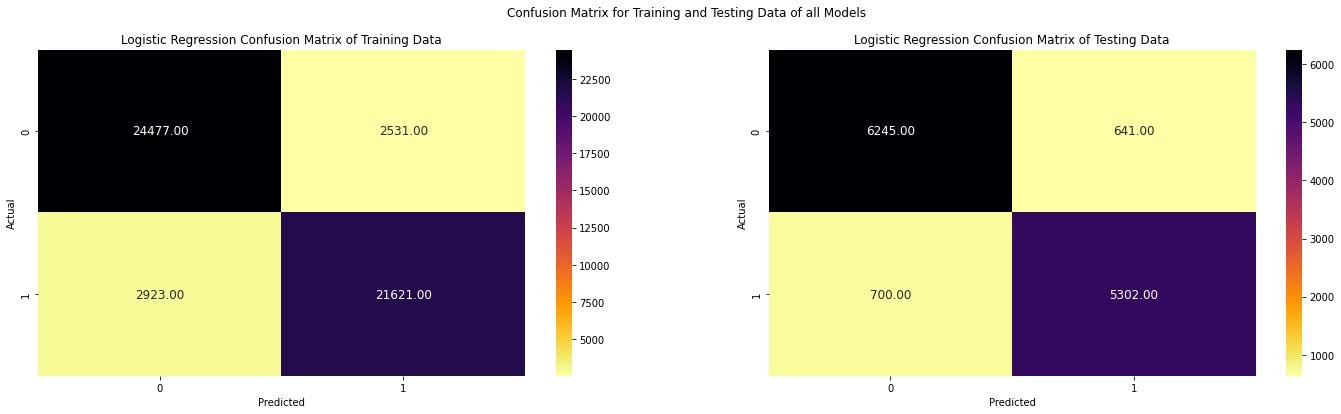

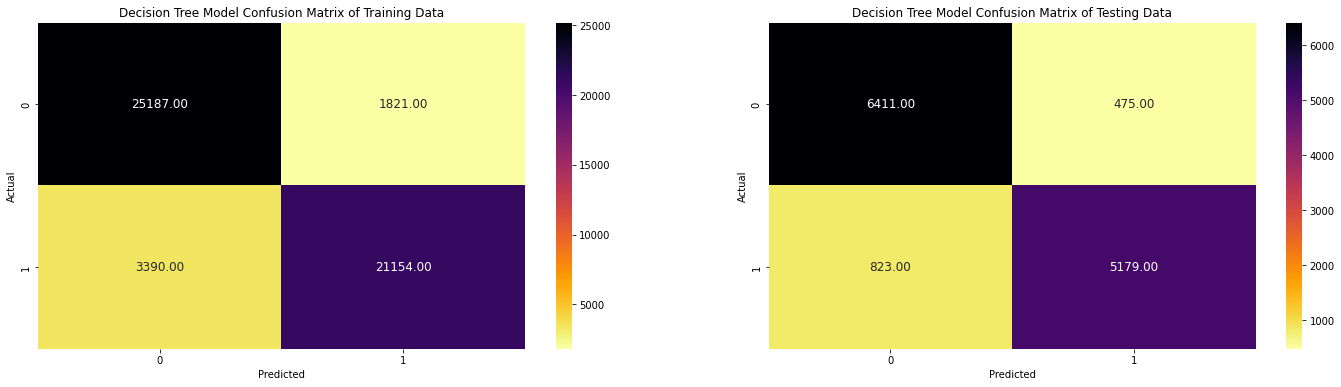

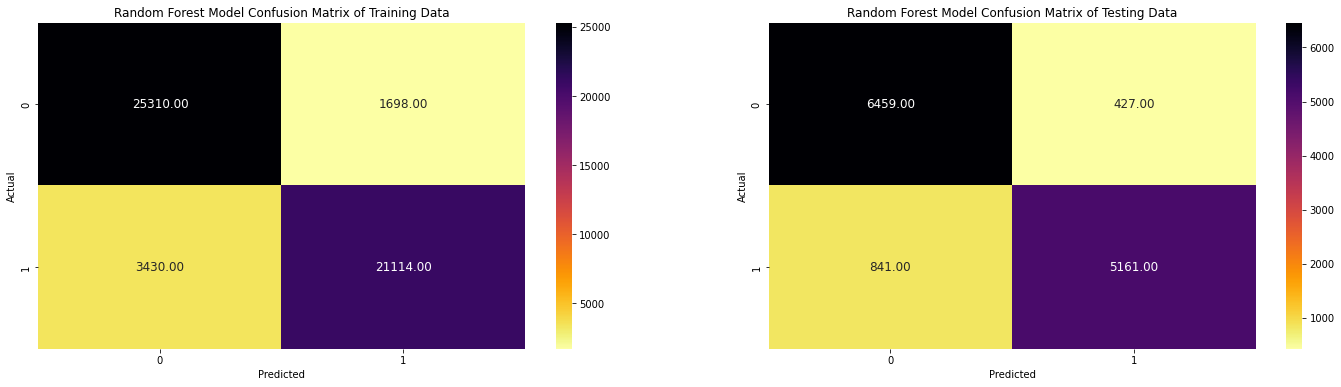

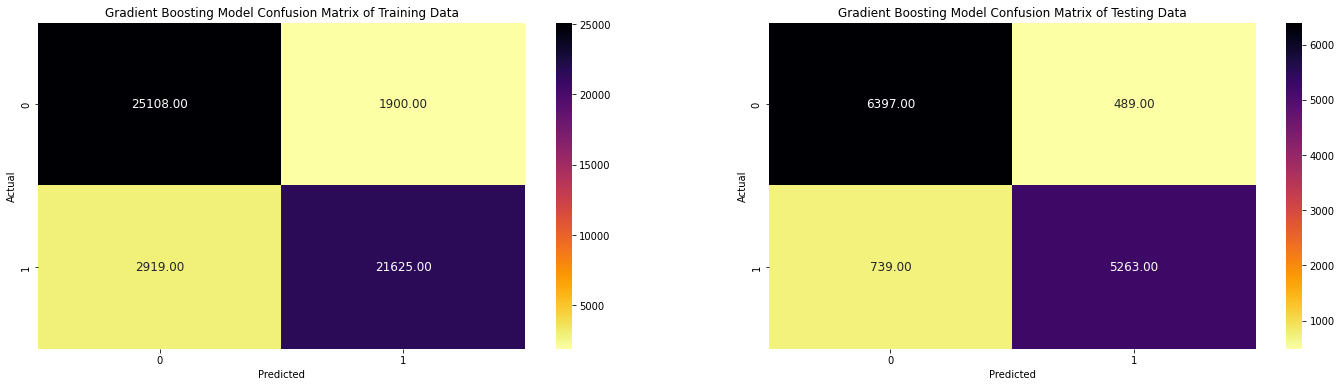

In [73]:
#Setting subplots
for model_ in range(len(models)):

  fig, ax =plt.subplots(1,2,figsize=(24,6))
  if model_==0:
    fig.suptitle('Confusion Matrix for Training and Testing Data of all Models')
  else:pass
  y_pred_train = models[model_].predict(X_train)
  y_pred_test = models[model_].predict(X_test)

  dat1_train= confusion_matrix(y_train, y_pred_train)
  dat2_test = confusion_matrix(y_test, y_pred_test)

  df_cm1 = pd.DataFrame(dat1_train, columns=np.unique(y_train), index = np.unique(y_train))
  df_cm2 = pd.DataFrame(dat2_test, columns=np.unique(y_test), index = np.unique(y_test))

  df_cm1.index.name = 'Actual'
  df_cm1.columns.name = 'Predicted'
  #sns.set(font_scale=1.4)#for label size
  df_cm2.index.name = 'Actual'
  df_cm2.columns.name = 'Predicted'

  a=sns.heatmap(df_cm1, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[0])
  a.set(title=name1[model_]+' of Training Data')
  print("")
  b=sns.heatmap(df_cm2, cmap="inferno_r", annot=True,annot_kws={"size": 12},fmt='.2f',ax=ax[1])
  b.set(title=name1[model_]+' of Testing Data')
  print("")
  fig.savefig('imagename'+str(model_)+'.png')
  fig.show()

##Saving all Models

In [74]:
import joblib

In [75]:
model_name=["log_reg","dec_tree_tuned","rand_forest_tuned","grad_boost_tuned"]

In [76]:
for model_ in range(len(models)):
  #Creating a File path to save a Model
  joblib_file =model_name[model_]+".pkl"
  # Save the trained model
  joblib.dump(models[model_], joblib_file)

In [77]:
# Load the pickled model
#joblib_LR_model = joblib.load(joblib_file)

#<u>Interpretation of All Fitted Models</u>

In [78]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 13.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c068ef6473f41e500a3580707732b2f6e96133233f177e6948aef6da1f6a754c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [79]:
# LIME Interpretation part
import lime
import lime.lime_tabular
from __future__ import print_function

In [80]:
predict_fn_logreg = lambda x: models[0].predict_proba(x).astype(float)
predict_fn_tree= lambda x: models[1].predict_proba(x).astype(float)
predict_fn_rf = lambda x: models[2].predict_proba(x).astype(float)
predict_fn_gb = lambda x: models[3].predict_proba(x).astype(float)

In [81]:
# Drop unwanted columns
train_df = airline_df.drop('recommended',axis=1)

In [82]:
# Extract features
float_columns=[]
cat_columns=[]
int_columns=[]

In [83]:
# Putting features into respective float, cat , int list.
for i in train_df.columns:
    if train_df[i].dtype == 'float' : 
        float_columns.append(i)
    elif train_df[i].dtype == 'int64':
        int_columns.append(i)
    elif train_df[i].dtype == 'object':
        cat_columns.append(i)

In [84]:
train_cat_features = train_df[cat_columns]
train_float_features = train_df[float_columns]

In [85]:
#One hot encoding
train_cat_features_ver2 = pd.get_dummies(train_cat_features, columns=['traveller_type','cabin'],drop_first=True)
train_cat_features_ver2.rename(columns={'traveller_type_Couple Leisure':'Couple Leisure','traveller_type_Family Leisure':'Family Leisure','traveller_type_Solo Leisure':'Solo Leisure','cabin_Economy Class':'Economy Class','cabin_First Class':'First Class','cabin_Premium Economy':'Premium Economy'},inplace=True)


In [86]:
# Line-up the feature names
feature_names_float = list(train_float_features)
feature_names_cat = list(train_cat_features_ver2)
#feature_names_int = list(train_int_features)
feature_names = sum([feature_names_float,feature_names_cat], [])

In [87]:
#create a unseen data
unseen_data=np.array([1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0],dtype=float)

__Model interpretation for Decision Tree using Tree Visualization__

In [88]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

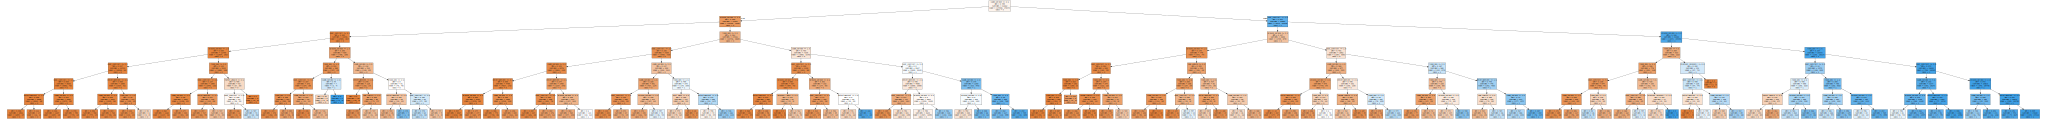

In [89]:
##fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph = Source(tree.export_graphviz(models[1], out_file=None,feature_names=X_train.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

In [90]:
#!dot -Tpng '/content/tree.dot' -o '/content/tree.dot.png'

###LIME Implementation

In [91]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = feature_names,
                                                   class_names=['0','1'],categorical_features=cat_columns, 
                                                   categorical_names=feature_names_cat, kernel_width=3)

__Model interpretation for Logistic Regression using LIME__

In [92]:
# Get the explanation for Logistic Regression
exp = explainer.explain_instance(unseen_data, predict_fn_logreg, num_features=6)
exp.show_in_notebook(show_all=False)

__Model interpretation for Random Forest using LIME__

In [93]:
# Get the explanation for Random Forest
exp = explainer.explain_instance(unseen_data, predict_fn_rf, num_features=6)
exp.show_in_notebook(show_all=False)

__Model interpretation for Gradient Boost using LIME__

In [94]:
# Get the explanation for gradient boosting
exp = explainer.explain_instance(unseen_data, predict_fn_gb, num_features=6)
exp.show_in_notebook(show_all=False)

<u>From above all plots</u>

  1. The outcome was **‘No’** class, as we could see that **cabin service, ground service,food beverage, entertainment**, and **seat comfort** were all factors responsible for our outcome.


###Shap Values Implementation

In [95]:
!pip install shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.0 MB/s 


In [96]:
import ipywidgets as widgets

In [97]:
explainer = shap.TreeExplainer(models[3])
shap_values = explainer.shap_values(X_train)

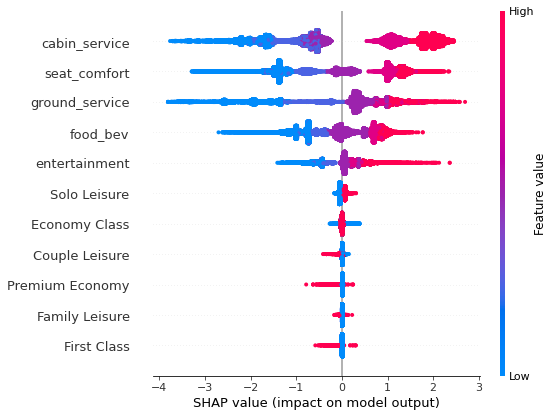

In [98]:
shap.summary_plot(shap_values, X_train)

In [99]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train.iloc[:,:],plot_cmap=["#9D27C7","#1CD077"])

<u>From above plot</u>

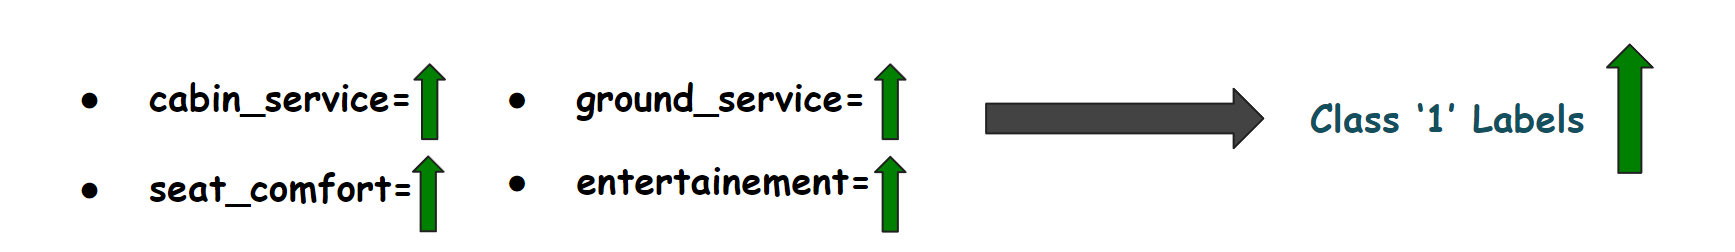

# <u>Conclusion</u>

1. The __Models__ used for this __Classsification problem__ are
        1. Logistic Regression Model
        2. Decision Tree Model
        3. Random Forest Model
        4. Gradient Boosting Model
2.  We performed __Hyperparameter tuning__ using __Gridsearch CV__ method for Decision Tree Model, Random Forest Model, and Gradient Boosting Model.
To __increase accuracy__ and __avoid Overfitting__ Criteria, this is done. After that, __we finalized the Gradient Boosting model__ by fine-tuning the hyperparameters.
3. Based on the __knowledge of the business__ and the __problem usecase__. The __Classification metrics__ of __Recall__ is given <u>__first priority__</u> , __Accuray__ is given <u>__second priority__</u> , and __ROC AUC__ is given <u>__third priority__</u>.
4. As a result, in order to increase their business or grow, our client must provide excellent **cabin service, ground service, food beverage entertainment, and seat comfort**.